In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("drugsComTest_raw.csv")
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [3]:
df.info()


df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


,uniqueID,rating,usefulCount
count,53766.000000,53766.000000,53766.000000
mean,116386.701187,6.976900,27.989752
std,67017.739881,3.285207,36.172833
min,0.000000,1.000000,0.000000
25%,58272.500000,4.000000,6.000000
50%,116248.500000,8.000000,16.000000
75%,174586.750000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


In [5]:
print(df.isnull().sum())

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64


In [7]:
print("Rows:", df.shape[0], " Columns:", df.shape[1])

Rows: 53766  Columns: 7


In [17]:

df['date'] = pd.to_datetime(df['date'])


df = df.sort_values('date')

df.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
39860,50731,Gabapentin,Postherpetic Neuralgia,"""I started trying gabapentin for fibromyalgia ...",8,2008-02-25,48
19170,23564,Methadone,Pain,"""I&#039;ve had chronic pain as a result of a c...",10,2008-02-25,118
3866,76191,Dinoprostone,Labor Induction,"""May have caused uterine hyperstimulation. Ev...",1,2008-02-25,37
45430,116476,Adalimumab,"Crohn's Disease, Maintenance","""My name is Serena. I have had chron&#039;s di...",10,2008-02-25,111
17201,200789,Varenicline,Smoking Cessation,"""On Chantix, I&#039;ve experienced constipatio...",3,2008-02-25,27


C:\Users\Sandip\AppData\Local\Temp\ipykernel_6080\186777260.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drugs.values, y=top_drugs.index, palette="viridis")


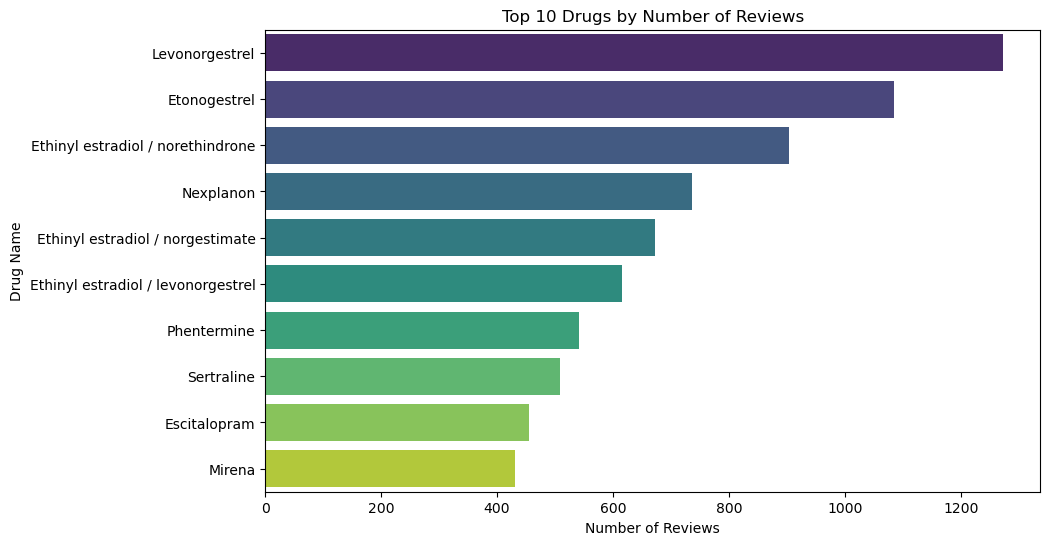

In [25]:
top_drugs = df['drugName'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_drugs.values, y=top_drugs.index, palette="viridis")
plt.title("Top 10 Drugs by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Drug Name")
plt.show()


C:\Users\Sandip\AppData\Local\Temp\ipykernel_6080\1824409140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette="coolwarm")


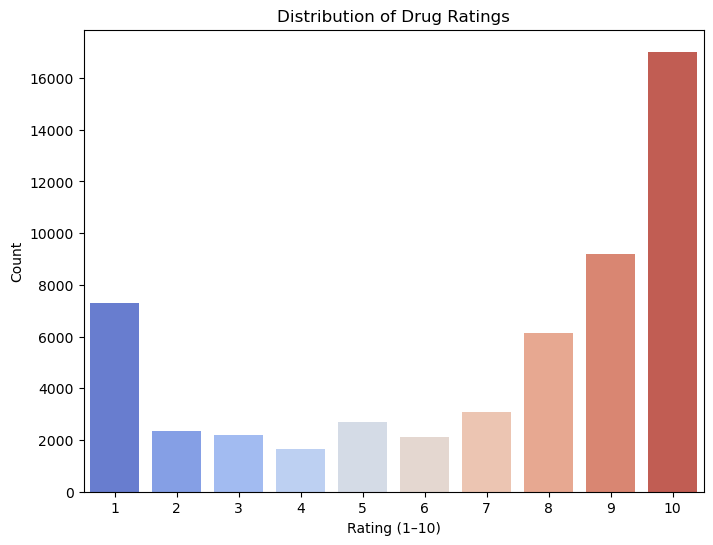

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='rating', data=df, palette="coolwarm")
plt.title("Distribution of Drug Ratings")
plt.xlabel("Rating (1–10)")
plt.ylabel("Count")
plt.show()


C:\Users\Sandip\AppData\Local\Temp\ipykernel_6080\1746837559.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_condition.values, y=avg_rating_condition.index, palette="mako")


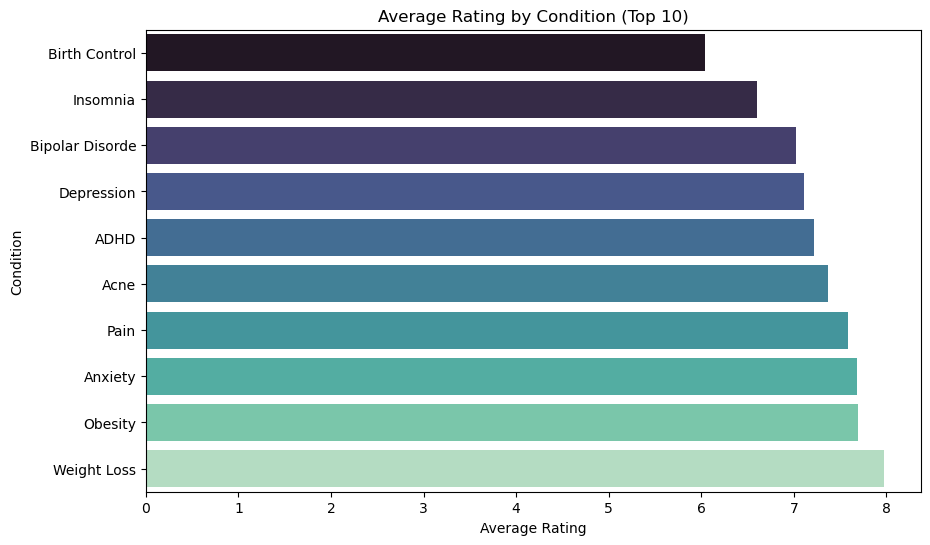

In [29]:
top_conditions = df['condition'].value_counts().head(10).index
avg_rating_condition = df[df['condition'].isin(top_conditions)].groupby("condition")["rating"].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating_condition.values, y=avg_rating_condition.index, palette="mako")
plt.title("Average Rating by Condition (Top 10)")
plt.xlabel("Average Rating")
plt.ylabel("Condition")
plt.show()


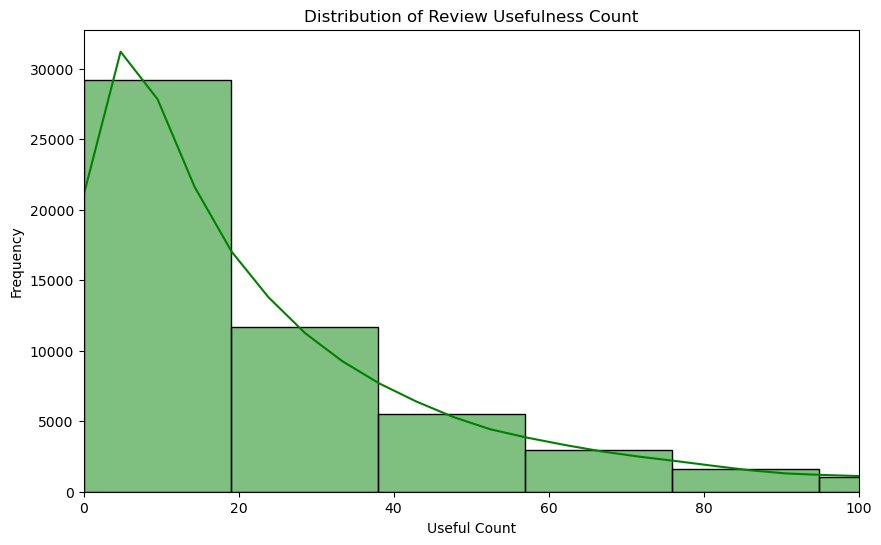

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df['usefulCount'], bins=50, kde=True, color="green")
plt.title("Distribution of Review Usefulness Count")
plt.xlabel("Useful Count")
plt.ylabel("Frequency")
plt.xlim(0, 100)  # zoom in for better view
plt.show()


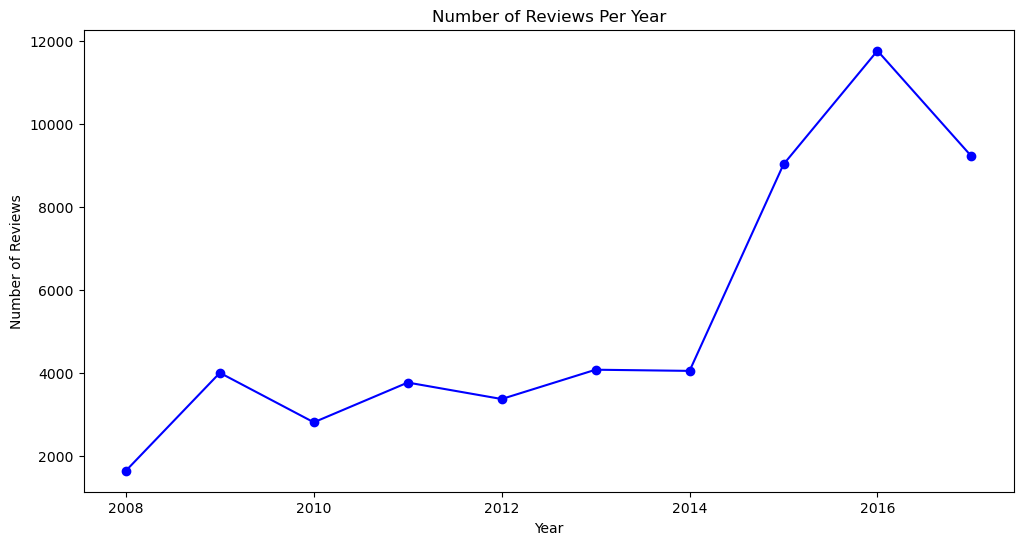

In [33]:

df['date'] = pd.to_datetime(df['date'], errors='coerce')

reviews_per_year = df.groupby(df['date'].dt.year)['uniqueID'].count()

plt.figure(figsize=(12,6))
reviews_per_year.plot(kind='line', marker='o', color='blue')
plt.title("Number of Reviews Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()
